In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from pathlib import Path
from PIL import Image

In [16]:
data_dir = Path("../data")
original_path = data_dir / "train.json"
convert_path = data_dir / "train.csv"

In [17]:
with open(original_path, 'r') as f:
    json_data = json.load(f)

In [20]:
print(json_data.keys())
print(json_data['images'][0].keys())
print(json_data['categories'][0].keys())
print(json_data['annotations'][0].keys())

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])
dict_keys(['license', 'url', 'file_name', 'height', 'width', 'date_captured', 'id'])
dict_keys(['id', 'name', 'supercategory'])
dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd'])


In [29]:
data = []
for image in json_data['images']:
    image_id = image['id']
    image_path = image['file_name']
    
    bboxes = [(box['category_id'], box['bbox']) for box in json_data['annotations'] if box['image_id'] == image_id]
    
    data.append((image_id, image_path, bboxes))

df = pd.DataFrame(data, columns=['image_id', 'image_path', 'bboxes'])
df.to_csv(convert_path, index=False)

In [61]:
categories = [category['name'] for category in json_data['categories']]
color = ['purple', 'red', 'blue', 'yellow', 'skyblue', 'darkorchid', 'lime', 'green', 'pink', 'pero', 'chocolate']

image 출력

In [62]:
def plot_img(info):
    fig, ax = plt.subplots(figsize=(20, 20))
    img = Image.open(data_dir / info.image_path)
    
    for bbox in info.bboxes:
        label = bbox[0]
        x, y, w, h = bbox[1]
        rect = patches.Rectangle(
            (x, y),
            w,
            h,
            linewidth=1,
            edgecolor=color[label],
            facecolor="none",
        )
        
        ax.text(x, y, categories[label], fontsize=10, color=color[label])
        ax.add_patch(rect)
        
    ax.imshow(img)

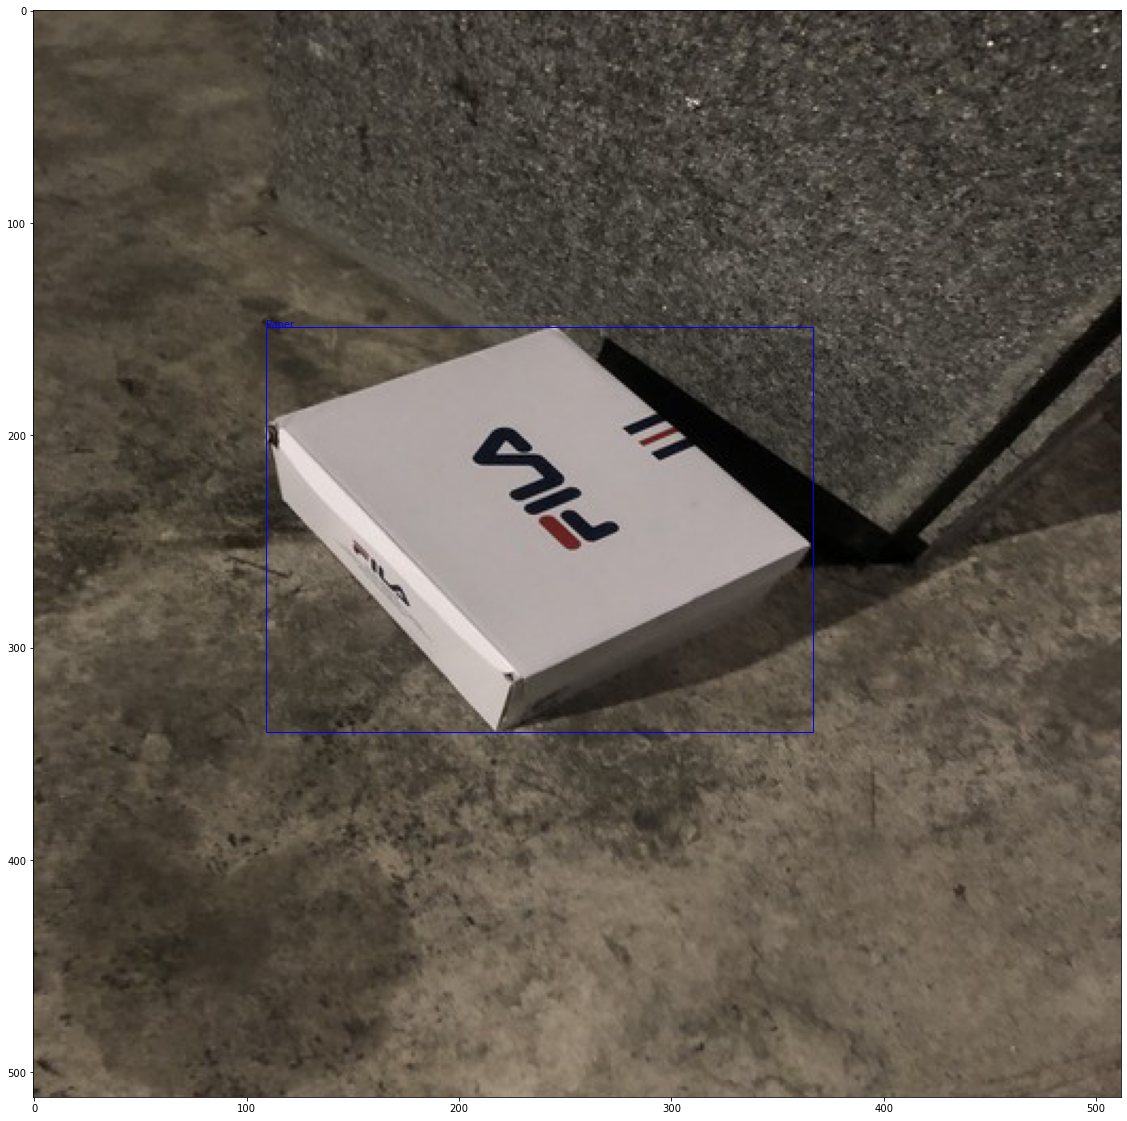

In [64]:
plot_img(df.loc[30])